# Predict the age of Abalone

### Problem - Predict the age of abalone using physical measurement features.
The age of an abalone is determined by counting the no. of rings.

### Dataset Information:
There are 4177 rows and 9 attributes for each row of the dataset. They are:

`Sex`(nominal) - M (male), F (female), I (infant)

`Length`(continuous) - longest shell measurement (in mm)

`Diameter`(continuous) - measurement perpendicular to legnth (in mm)

`Height`(continuous) - with meat in shell (in mm)

`Whole weight`(continuous) - the whole abalone (in grams)

`Shucked weight`(continuous) - weight of the meat (in grams)

`Viscera weight`(continuous) - gut weight after bleeding (in grams)

`Shell weight`(continuous) - after being dried (in grams)

`Rings`(continuous) - gives the age in years

### Solution
Create a model which will predict the age of an abalone from physical measurements. 

### Imports all the required libraries 

In [365]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, plot_confusion_matrix, r2_score
from sklearn.feature_selection import SelectKBest, f_regression 
from sklearn.preprocessing import  StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

### Import the dataset 

In [366]:
df_ab = pd.read_csv('abalone.data', header=None, index_col=False)
df_ab.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 
                 'shell_weight', 'rings']

df_ab.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [367]:
# information about the data
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


According to above observation, all the features are numerical except column - `sex`

In [368]:
# checking for any data with null value/missing value
missing_val = df_ab.isnull().sum().sort_values(ascending = False)
percentage_of_missing_val = (missing_val/len(df_ab))*100
pd.concat([missing_val, percentage_of_missing_val], axis = 1, keys= ['Missing Values', '% Missing Value'])

,Missing Values,% Missing Value
rings,0,0.0
shell_weight,0,0.0
viscera_weight,0,0.0
shucked_weight,0,0.0
whole_weight,0,0.0
height,0,0.0
diameter,0,0.0
length,0,0.0
sex,0,0.0


According to above observation, their is no missing/null values in the dataset.

In [369]:
# describing the data
df_ab.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Exploratory Data Analysis (EDA) 

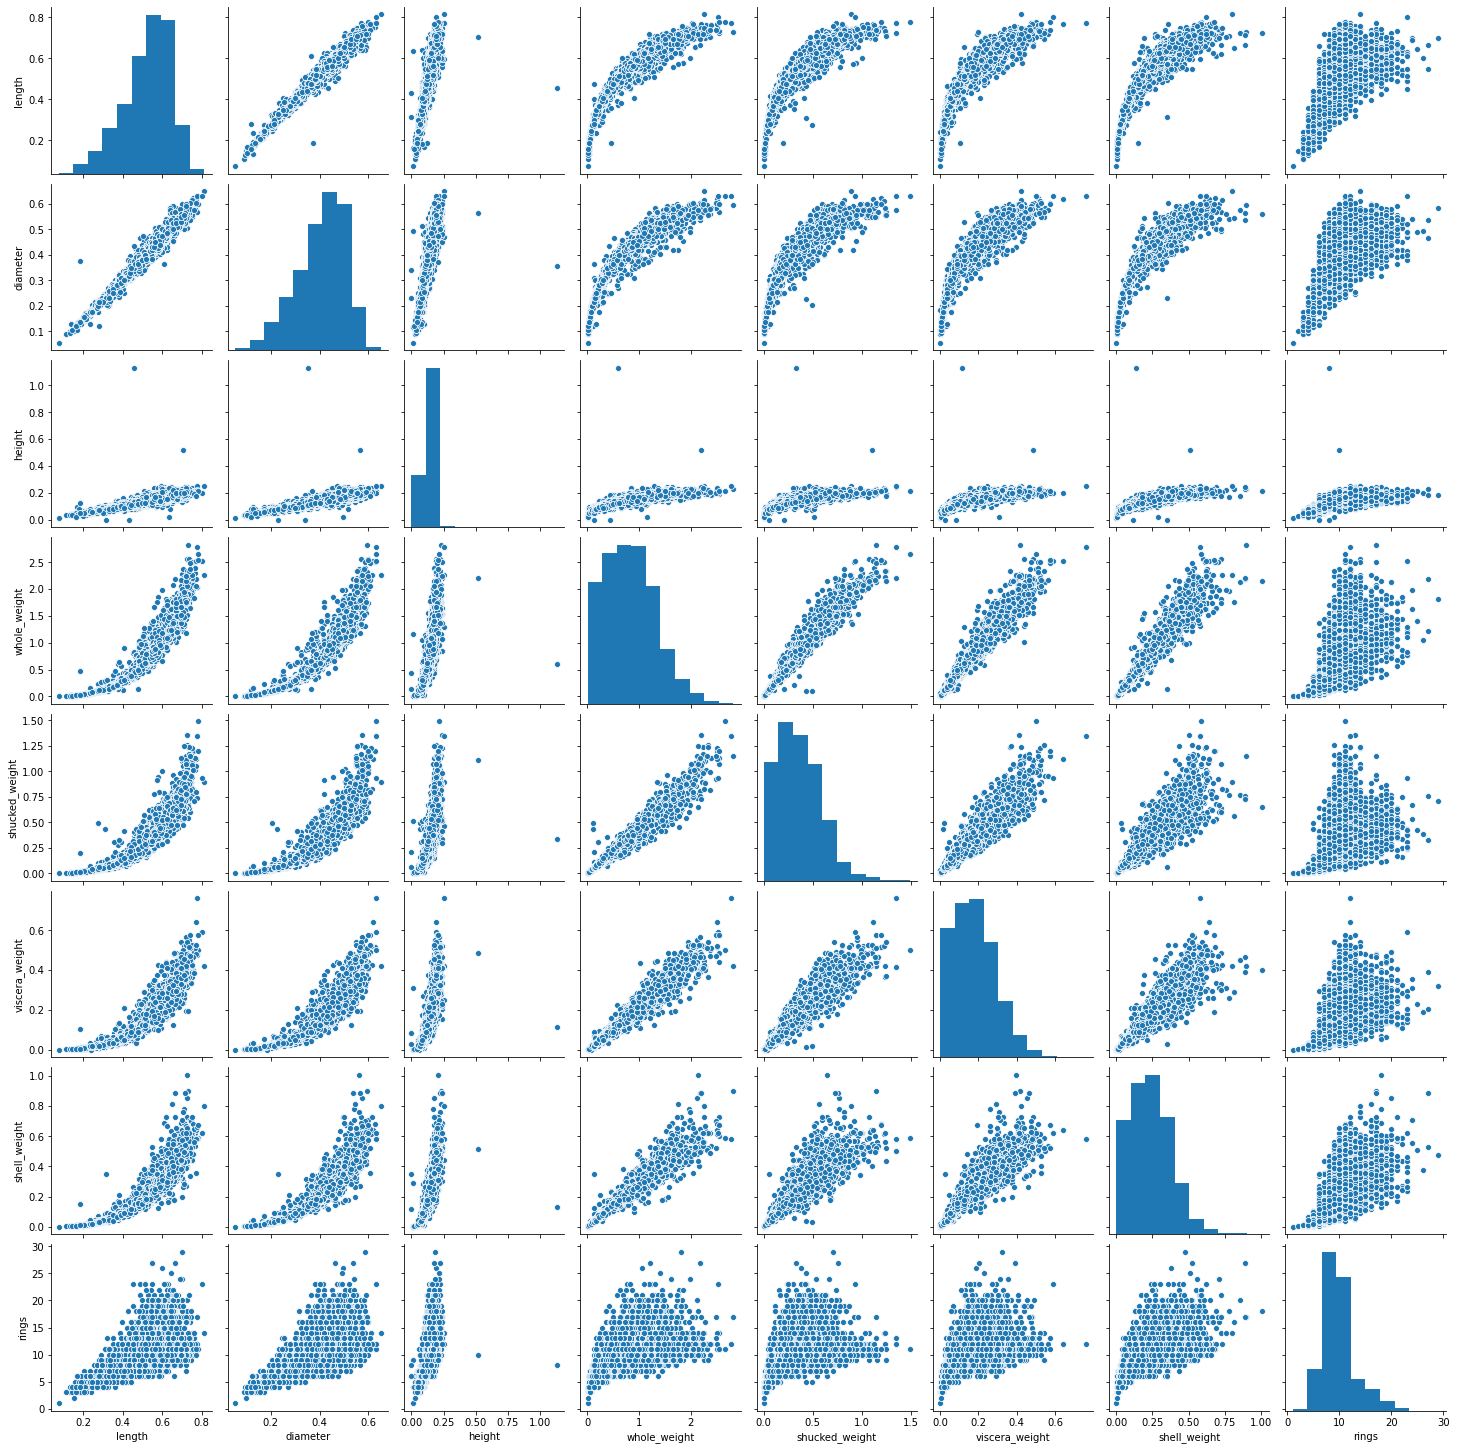

In [300]:
#Plot pairplot
sns.pairplot(df_ab)
plt.show()

According to above observation,most of the features are close to normality and each feature has different scale range

### Co-relation between the features

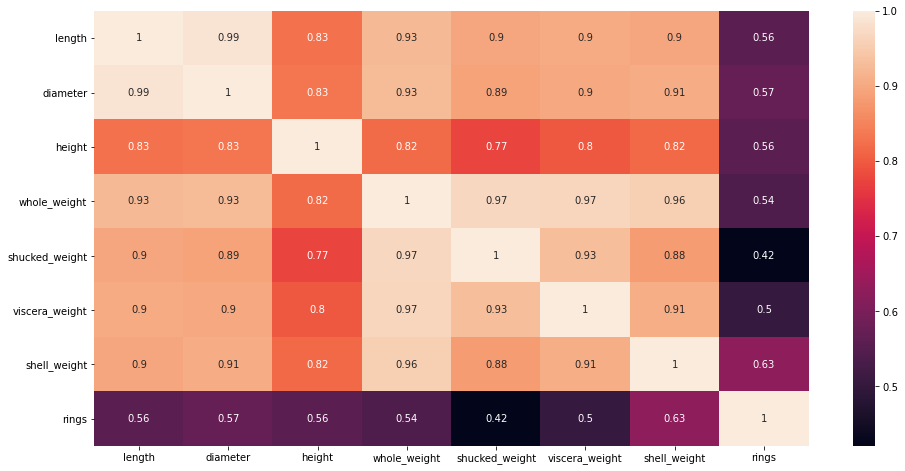

In [301]:
numerical_features = df_ab.select_dtypes(include=[np.number]).columns
categorical_features = df_ab.select_dtypes(include=[np.object]).columns

# heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df_ab[numerical_features].corr(),annot=True)

According to above observation: 
 - Whole Weight is almost co-related with all other features except with column - `rings`
 - Height and length has least linearity with target feature - `rings`.
 - rings is mostly co-related with Shell Weight and least co-related with Shucked Weight.

Such high correlation among features can leads to multi-collinearity. We need to handle that.

## Exploratory Data Analysis (EDA) 

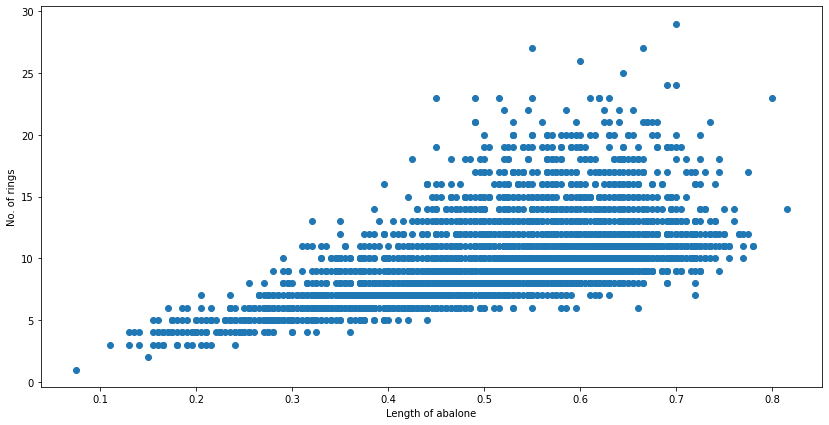

In [302]:
# Lets understand the distribution of length with respect to no. of rings by plot scatter plot graph
plt.figure(figsize=(14,7))
plt.scatter(df_ab['length'], df_ab['rings'])
plt.xlabel('Length of abalone')
plt.ylabel('No. of rings')
plt.show()

We can observe the multiple outlier in `length` column with respect to no. of rings

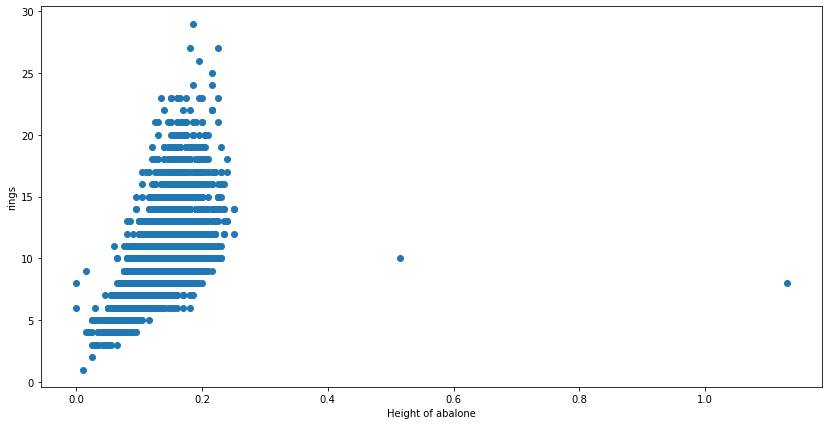

In [303]:
# Lets understand the distribution of height with respect to no. of rings by plot scatter plot graph
plt.figure(figsize=(14,7))
plt.scatter(df_ab['height'], df_ab['rings'])
plt.xlabel('Height of abalone')
plt.ylabel('rings')
plt.show()

We can observe the multiple outlier in `height` column with respect to no. of rings

In [370]:
# checkig the values of sex
df_ab['sex'].value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

Dataset has almost equal distribution with respect to the `sex` column.

### Convert into Dummy Variables using one-hot encoding
The categorical feature - `sex` needs to be transformed into dummy variables inturn to be more useful in the modeling the algorithm.

In [371]:
df_dummies_features = pd.get_dummies(df_ab['sex'], drop_first = True, prefix = "Sex_")

# Inserting dummy columns
for column in df_dummies_features.columns:
    df_ab[column] = df_dummies_features[column]
    
# Dropping the original column
df_ab = df_ab.drop(columns = ['sex'])

print(df_ab.shape)

(4177, 10)


## Feature Selection and Standardization

#### Creating training and test dataset for model which will predict the no. of rings(Age)

In [372]:
X = df_ab.drop('rings', axis = 1)
y = df_ab['rings'].values.reshape(-1, 1)

#Feature Selection to handle multi-collinearity 
X_best = SelectKBest(f_regression, k=5).fit_transform(X, y.ravel())  

# Performing Scaling
standardScale = StandardScaler()
X = standardScale.fit_transform(X)

In [373]:
#Spilt the dataset as training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=45)

#Performing multi-linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Root Mean Squared Error for Training set
train_rmse = round(np.sqrt(mean_squared_error(y_train, lin_reg.predict(X_train))),4)
print(f'Train-set RMSE: {train_rmse}')

#RMSE of Test dataset
test_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared : {round(r2_score(y_test,y_pred),4)}')

Train-set RMSE: 2.18
Test-set RMSE: 2.2294
R_squared : 0.516


### Ridge regression with Regularization 

In [374]:
# Performing hyperparameter tunning using GrideSearchCV to handle high multicollinearity 
parameters = {'alpha': [1e-5, 1e-2, 1, 5, 7]}
ridge_reg = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)
ridge_reg.fit(X_train, y_train)

print(ridge_reg.best_params_)
print(-ridge_reg.best_score_)

{'alpha': 1}
4.985505132979677


In [375]:
#Performing Ridge regression
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

# Root Mean Squared Error for Training set
train_rmse = round(np.sqrt(mean_squared_error(y_train, ridge_reg.predict(X_train))),4)
print(f'Train-set RMSE: {train_rmse}')

y_pred = ridge_reg.predict(X_test)
# RMSE for Test Data
test_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y_test,y_pred),4)}')

Train-set RMSE: 2.18
Test-set RMSE: 2.2304
R_squared: 0.5155


### Lasso regression with regularization

In [376]:
# Performing hyperparameter tunning using GrideSearchCV
parameters = {'alpha': [1e-5, 1e-4, 1e-2, 1, 5, 10]}
lasso_reg = GridSearchCV(Lasso(tol=0.05), parameters, scoring='neg_mean_squared_error', cv=5, n_jobs = -1)
lasso_reg.fit(X_train, y_train)

print(lasso_reg.best_params_)
print(-lasso_reg.best_score_)

{'alpha': 0.0001}
4.98633072621295


In [377]:
#Performing lasso regression
lasso_reg = Lasso(alpha=0.0001)
lasso_reg.fit(X_train, y_train)

# Root Mean Squared Error for Training set
train_rmse = round(np.sqrt(mean_squared_error(y_train, lasso_reg.predict(X_train))),4)
print(f'Train-set RMSE: {train_rmse}')

y_pred = lasso_reg.predict(X_test)
# RMSE for Test data
test_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y_test,y_pred),4)}')

Train-set RMSE: 2.18
Test-set RMSE: 2.2294
R_squared: 0.516


### Decision-tree based models 

In [378]:
dec_tree_reg = DecisionTreeRegressor(random_state=45)
dec_tree_reg.fit(X_train, y_train)

# Root Mean Squared Error for Training set
train_rmse = round(np.sqrt(mean_squared_error(y_train, dec_tree_reg.predict(X_train))),4)
print(f'Train-set RMSE: {train_rmse}')

y_pred = dec_tree_reg.predict(X_test)
# Root Mean Squared Error for Training set
test_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

#using Cross-Validation 
scores = cross_val_score(dec_tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=3, n_jobs = -1) 
tree_rmse_scores = np.sqrt(-scores)
print(f'RMSE Score using cross-val: {tree_rmse_scores}')

#R_squared of model for test data set
print(f'R_squared: {round(r2_score(y_test,y_pred),4)}')

Train-set RMSE: 0.0
Test-set RMSE: 3.1346
RMSE Score using cross-val: [2.99296749 3.11435928 2.99472717]
R_squared: 0.0431


According above observation: R_squared value is very low and also model is also overfit for training dataset. we should perform Hyperparameter tuning to reduce the overfitting with respect to Decision tree model

### Hyperparameter tuning

In [260]:
dtc_params={"max_depth" : [3,5,8],
            "min_samples_split": [3, 5, 7],
           "min_samples_leaf":[1,3,5],
           "min_weight_fraction_leaf":[0.1,0.3,0.5]
          }

dtc_ht=GridSearchCV(dec_tree_reg,dtc_params,scoring='neg_mean_squared_error',cv=3)
dtc_ht.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=45),
             param_grid={'max_depth': [3, 5, 8], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [3, 5, 7],
                         'min_weight_fraction_leaf': [0.1, 0.3, 0.5]},
             scoring='neg_mean_squared_error')

In [261]:
# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y_train, dtc_ht.predict(X_train))),4)
print(f'Train RMSE: {train_rmse}')

y_pred = dtc_ht.predict(X_test)
# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y_test, y_pred),4)}')


Train RMSE: 2.4136
Test RMSE: 2.5457
R_squared: 0.3689


### Random forest  Regressor

In [379]:
rf_reg = RandomForestRegressor(random_state=45)
rf_reg.fit(X_train, y_train.ravel()) 

# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y_train, rf_reg.predict(X_train))),4)
print(f'Train-set RMSE: {train_rmse}')

y_pred = rf_reg.predict(X_test)
# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Test-set RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y_test,y_pred),4)}')

Train-set RMSE: 0.8065
Test-set RMSE: 2.2335
R_squared: 0.5142


### Hyperparameter Tuning

In [263]:
rf_params = {
    'n_estimators': [10, 45, 90],
    'max_depth': [2, 5, 10],
    'min_samples_split': [3, 5, 12],
    'min_samples_leaf': [2, 5, 7],
    'random_state': [45]
}

rf_reg = GridSearchCV(rf_reg, rf_params, cv = 3)
rf_reg.fit(X_train, y_train.ravel()) 

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=45),
             param_grid={'max_depth': [2, 5, 10], 'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [3, 5, 12],
                         'n_estimators': [10, 45, 90], 'random_state': [45]})

In [264]:
# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y_train, rf_reg.predict(X_train))),4)
print(f'Train RMSE: {train_rmse}')

y_pred = rf_reg.predict(X_test)
# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y_test, y_pred),4)}')


Train RMSE: 1.6615
Test RMSE: 2.2062
R_squared: 0.526


### Adaboost Regressor

In [380]:
ad_bst = AdaBoostRegressor(random_state=45)
ad_bst.fit(X_train, y_train.ravel())

# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y_train, ad_bst.predict(X_train))),4)
print(f'Train RMSE: {train_rmse}')

y_pred = ad_bst.predict(X_test)
# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y_test, y_pred),4)}')

Train RMSE: 3.0145
Test RMSE: 3.1602
R_squared: 0.0274


### Gradient Boosting Regressor

In [381]:
gbrt = GradientBoostingRegressor(random_state=45)
gbrt.fit(X_train, y_train.ravel())

# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y_train, gbrt.predict(X_train))),4)
print(f'Train RMSE: {train_rmse}')

y_pred = gbrt.predict(X_test)
# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y_test, y_pred),4)}')

Train RMSE: 1.8553
Test RMSE: 2.2145
R_squared: 0.5224


### XGBoost Regressor

In [382]:
xgbr = XGBRegressor(random_state=45)
xgbr.fit(X_train, y_train.ravel())
y_pred = xgbr.predict(X_test)

# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y_train, xgbr.predict(X_train))),4)
print(f'Train RMSE: {train_rmse}')

# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y_test, y_pred),4)}')

Train RMSE: 0.7181
Test RMSE: 2.3512
R_squared: 0.4616


### Hyperparameter Tuning

In [272]:
xgb_params = {
              "learning_rate": [0.03, 0.3],
              "max_depth": [2, 6, 10],
              "n_estimators": [100, 150, 250]
            }

xgb_ht = GridSearchCV(xgbr, xgb_params, scoring='neg_mean_squared_error', cv = 3)
xgb_ht.fit(X_train, y_train.ravel()) 

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=45,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
     

In [273]:
# Train RMSE
train_rmse = round(np.sqrt(mean_squared_error(y_train, xgb_ht.predict(X_train))),4)
print(f'Train RMSE: {train_rmse}')

y_pred = xgb_ht.predict(X_test)
# Test RMSE
test_rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
print(f'Test RMSE: {test_rmse}')

# R_squared of model for test data set
print(f'R_squared: {round(r2_score(y_test,y_pred),4)}')

Train RMSE: 1.8606
Test RMSE: 2.2086
R_squared: 0.5249


### Performance evaluation of Model

In [383]:
Perf_eval = {
    'model': ['Linear regression', 'Linear regression + Ridge', 'Linear regression + Lasso', 'Decision Tree',
              'Random Forest','Adaboost Regressor','Gradient Boosting Regressor', 'XGBoost Regressor'],
    'RMSE'      : [2.2294, 2.2304, 2.22947, 2.5457, 2.2062, 3.1602, 2.2145, 2.2086],
    'R_SQUARED' : [0.516, 0.5155, 0.516, 0.36897, 0.526, 0.02747, 0.5224, 0.5249]
}

eval_df = pd.DataFrame(data=Perf_eval)
eval_df.sort_values(by=['RMSE'], ascending=True)

,model,RMSE,R_SQUARED
4,Random Forest,2.20620,0.52600
7,XGBoost Regressor,2.20860,0.52490
6,Gradient Boosting Regressor,2.21450,0.52240
0,Linear regression,2.22940,0.51600
2,Linear regression + Lasso,2.22947,0.51600
1,Linear regression + Ridge,2.23040,0.51550
3,Decision Tree,2.54570,0.36897
5,Adaboost Regressor,3.16020,0.02747


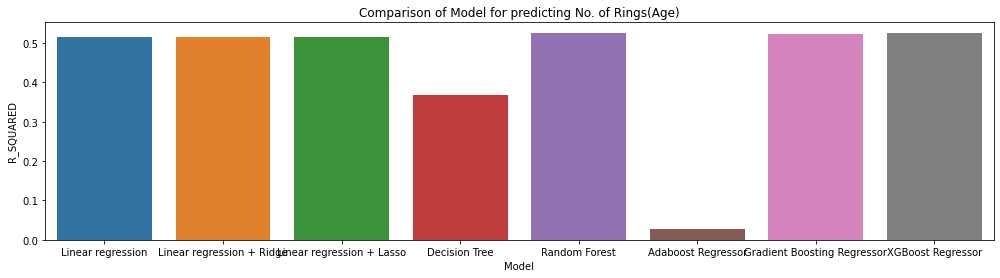

In [384]:
plt.figure(figsize=(17,4))
sns.barplot(x= eval_df['model'],
            y=eval_df['R_SQUARED'],
            data = eval_df
           )
plt.xlabel('Model')
plt.ylabel('R_SQUARED')
plt.title('Comparison of Model for predicting No. of Rings(Age)')
plt.show()

##### Adding column - `age`  in the dataset for classification of Age. Age will be classified based on the no. of rings
###### If no. of rings is between 1 to 8 - Age 1, denotes young age
###### If no. of rings between  9 to 10 - Age 2, denotes middle  age
###### If no. of rings between  11 to 29 - Age 3, denotes old age

In [385]:
def class_age (row):
   if row['rings']>=1 and row['rings']<=8:
      return 1
   elif row['rings'] >=9 and row['rings']<=10:
      return 2
   elif row['rings']>=11 and row['rings']<=29:
      return 3
   return 0

In [386]:
df_ab['Age'] = df_ab.apply(lambda _: '', axis=1)

df_ab['Age']=df_ab.apply (lambda row: class_age (row),axis=1)

df_ab['Age'].value_counts()

3    1447
1    1407
2    1323
Name: Age, dtype: int64

According to above observation, all the 3 class have almost same no. of data indicating a balanced dataset.

### Feature Selection and Standardization for Classification

In [387]:
#split the dataset for classification 
X = df_ab.drop(['Age','rings'], axis=1).values
y = df_ab['Age'].values

# Performing Scaling
standardScale = StandardScaler()
X = standardScale.fit_transform(X)

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

## Logistic Regression

Model fitness
-------------------------
Train-set Score: 0.6628
Test-set Score: 0.6258
Accuracy: 62.5837




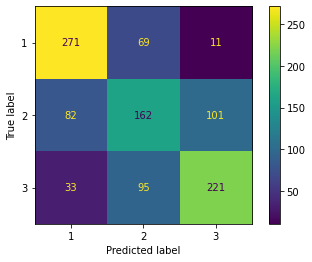

Classification report for Test dataset:
---------------------------------------------------------
              precision    recall  f1-score   support

           1       0.70      0.77      0.74       351
           2       0.50      0.47      0.48       345
           3       0.66      0.63      0.65       349

    accuracy                           0.63      1045
   macro avg       0.62      0.62      0.62      1045
weighted avg       0.62      0.63      0.62      1045



In [388]:
# Implementing Logistic classification with Ridge(L2) penalty
log_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg', random_state=45)
log_reg.fit(X_train, y_train.ravel())
y_pred=log_reg.predict(X_test) 

# model fitness foe both train and test dataset
print('Model fitness') 
print('-'*25)
log_reg_train = log_reg.score(X_train, y_train)
print('Train-set Score:', round(log_reg_train,4))
log_reg_test = log_reg.score(X_test, y_test)
print('Test-set Score:', round(log_reg_test,4))
print('Accuracy:', round(accuracy_score(y_test, y_pred)*100,4))
print('\n') 

#calculate Confusion Matrix
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

print("Classification report for Test dataset:")
print('-'*57)
print(classification_report(y_test, y_pred))

## Decision Tree Classifier

Model fitness
-------------------------
Train-set Score: 1.0
Test-set Score: 0.5713
Accuracy: 57.1292




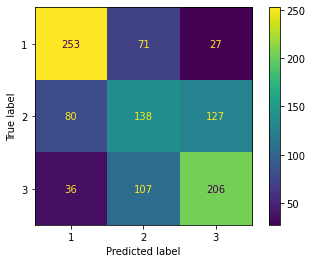

Classification report for Test dataset:
---------------------------------------------------------
              precision    recall  f1-score   support

           1       0.69      0.72      0.70       351
           2       0.44      0.40      0.42       345
           3       0.57      0.59      0.58       349

    accuracy                           0.57      1045
   macro avg       0.56      0.57      0.57      1045
weighted avg       0.57      0.57      0.57      1045



In [389]:
dtc = DecisionTreeClassifier(random_state=45)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

# model fitness foe both train and test dataset
print('Model fitness') 
print('-'*25)
dtc_train = dtc.score(X_train, y_train)
print('Train-set Score:', round(dtc_train,4))
dtc_test = dtc.score(X_test, y_test)
print('Test-set Score:', round(dtc_test,4))
print('Accuracy:', round(accuracy_score(y_test, y_pred)*100,4))
print('\n') 

#calculate Confusion Matrix
plot_confusion_matrix(dtc, X_test, y_test)
plt.show()

print("Classification report for Test dataset:")
print('-'*57)
print(classification_report(y_test, y_pred))

### Hyperparameter Tuning

In [311]:
dtc_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 10],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [1, 2, 5],
    'random_state': [45]
}

dtc_ht = GridSearchCV(dtc, dtc_params, scoring='accuracy', cv=3)
dtc_ht.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=45),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [3, 5, 7], 'random_state': [45]},
             scoring='accuracy')

In [312]:
dtc_ht.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'random_state': 45}

In [313]:
round(dtc_ht.best_score_, 4)

0.6376

Model fitness
-------------------------
Train-set Score: 0.6686
Test-set Score: 0.6182
Accuracy: 61.818




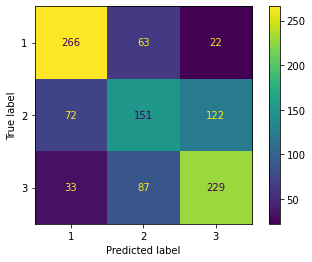

Classification report for Test dataset:
---------------------------------------------------------
              precision    recall  f1-score   support

           1       0.72      0.76      0.74       351
           2       0.50      0.44      0.47       345
           3       0.61      0.66      0.63       349

    accuracy                           0.62      1045
   macro avg       0.61      0.62      0.61      1045
weighted avg       0.61      0.62      0.61      1045



In [314]:
y_pred = dtc_ht.best_estimator_.predict(X_test)

# model fitness for both train and test dataset
print('Model fitness') 
print('-'*25)
dtc_ht_train = dtc_ht.score(X_train, y_train)
print('Train-set Score:', round(dtc_ht_train,4))
dtc_ht_test = dtc_ht.score(X_test, y_test)
print('Test-set Score:', round(dtc_ht_test,4))
print('Accuracy:', round(accuracy_score(y_test, y_pred)*100,3))
print('\n') 

#calculate Confusion Matrix
plot_confusion_matrix(dtc_ht, X_test, y_test)
plt.show()

print("Classification report for Test dataset:")
print('-'*57)
print(classification_report(y_test, y_pred))

## Random forest Classifier

Model fitness
-------------------------
Train-set Score: 1.0
Test-set Score: 0.6373
Accuracy: 63.732




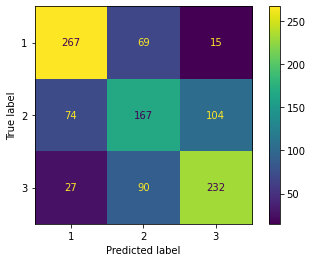

Classification report for Test dataset:
---------------------------------------------------------
              precision    recall  f1-score   support

           1       0.73      0.76      0.74       351
           2       0.51      0.48      0.50       345
           3       0.66      0.66      0.66       349

    accuracy                           0.64      1045
   macro avg       0.63      0.64      0.63      1045
weighted avg       0.63      0.64      0.64      1045



In [390]:
#Random Forest
rfc = RandomForestClassifier(random_state=45)
rfc.fit(X_train, y_train)
#preds = rfc.predict_proba(X_test)[:,1]
y_pred=rfc.predict(X_test)

# model fitness for both train and test dataset
print('Model fitness') 
print('-'*25)
rfc_train = rfc.score(X_train, y_train)
print('Train-set Score:', round(rfc_train,4))
rfc_test = rfc.score(X_test, y_test)
print('Test-set Score:', round(rfc_test,4))
print('Accuracy:', round(accuracy_score(y_test, y_pred)*100,3))
print('\n') 

#calculate Confusion Matrix
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

print("Classification report for Test dataset:")
print('-'*57)
print(classification_report(y_test, y_pred))

### Hyperparameter Tuning

In [316]:
rfc_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 7, 10],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [1, 2, 5],
    'random_state': [45]
}

rfc_ht = GridSearchCV(rfc, rfc_params, scoring='accuracy', cv=3)
rfc_ht.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=45),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [3, 5, 7], 'random_state': [45]},
             scoring='accuracy')

In [317]:
rfc_ht.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'random_state': 45}

In [318]:
round(rfc_ht.best_score_, 4)

0.6651

Model fitness
-------------------------
Train-set Score: 0.7545
Test-set Score: 0.6258
Accuracy: 62.584




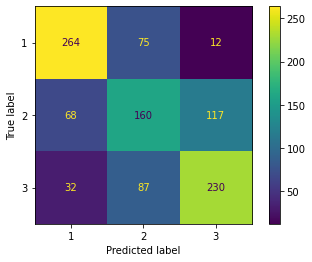

Classification report for Test dataset:
---------------------------------------------------------
              precision    recall  f1-score   support

           1       0.73      0.75      0.74       351
           2       0.50      0.46      0.48       345
           3       0.64      0.66      0.65       349

    accuracy                           0.63      1045
   macro avg       0.62      0.62      0.62      1045
weighted avg       0.62      0.63      0.62      1045



In [391]:
y_pred = rfc_ht.best_estimator_.predict(X_test)

# model fitness for both train and test dataset
print('Model fitness') 
print('-'*25)
rfc_ht_train = rfc_ht.score(X_train, y_train)
print('Train-set Score:', round(rfc_ht_train,4))
rfc_ht_test = rfc_ht.score(X_test, y_test)
print('Test-set Score:', round(rfc_ht_test,4))
print('Accuracy:', round(accuracy_score(y_test, y_pred)*100,3))
print('\n') 

#calculate Confusion Matrix
plot_confusion_matrix(rfc_ht, X_test, y_test)
plt.show()

print("Classification report for Test dataset:")
print('-'*57)
print(classification_report(y_test, y_pred))

### AdaBoost Classifier

Model fitness
-------------------------
Train-set Score: 0.6731
Test-set Score: 0.6306
Accuracy: 63.062




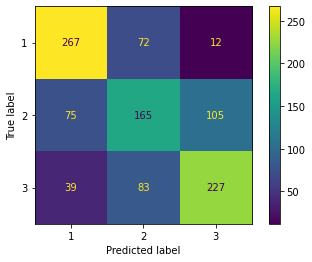

Classification report for Test dataset:
---------------------------------------------------------
              precision    recall  f1-score   support

           1       0.70      0.76      0.73       351
           2       0.52      0.48      0.50       345
           3       0.66      0.65      0.66       349

    accuracy                           0.63      1045
   macro avg       0.63      0.63      0.63      1045
weighted avg       0.63      0.63      0.63      1045



In [392]:
#Implementing AdaBoost Classifier
abc = AdaBoostClassifier(random_state=45)
abc.fit(X_train, y_train)
y_pred=abc.predict(X_test)

# model fitness for both train and test dataset
print('Model fitness') 
print('-'*25)
abc_train = abc.score(X_train, y_train)
print('Train-set Score:', round(abc_train,4))
abc_test = abc.score(X_test, y_test)
print('Test-set Score:', round(abc_test,4))
print('Accuracy:', round(accuracy_score(y_test, y_pred)*100,3))
print('\n') 

#calculate Confusion Matrix
plot_confusion_matrix(abc, X_test, y_test)
plt.show()

print("Classification report for Test dataset:")
print('-'*57)
print(classification_report(y_test, y_pred))

## Gradient Boosting Classifier

Model fitness
-------------------------
Train-set Score: 0.7669
Test-set Score: 0.6383
Accuracy: 63.828




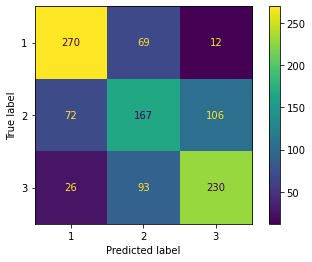

Classification report for Test dataset:
---------------------------------------------------------
              precision    recall  f1-score   support

           1       0.73      0.77      0.75       351
           2       0.51      0.48      0.50       345
           3       0.66      0.66      0.66       349

    accuracy                           0.64      1045
   macro avg       0.63      0.64      0.64      1045
weighted avg       0.63      0.64      0.64      1045



In [331]:
#Implementing Gradient Boosted Classifier
gbc = GradientBoostingClassifier(random_state=45) # n_estimators= 300, max_depth = 3, min_samples_leaf= 2
gbc.fit(X_train, y_train)
y_pred=gbc.predict(X_test)

# model fitness for both train and test dataset
print('Model fitness') 
print('-'*25)
gbc_train = gbc.score(X_train, y_train)
print('Train-set Score:', round(gbc_train,4))
gbc_test = gbc.score(X_test, y_test)
print('Test-set Score:', round(gbc_test,4))
print('Accuracy:', round(accuracy_score(y_test, y_pred)*100,3))
print('\n') 

#calculate Confusion Matrix
plot_confusion_matrix(gbc, X_test, y_test)
plt.show()

print("Classification report for Test dataset:")
print('-'*57)
print(classification_report(y_test, y_pred))

### XGBoost Classifier

Model fitness
-------------------------
Train-set Score: 0.9888
Test-set Score: 0.6172
Accuracy: 61.722




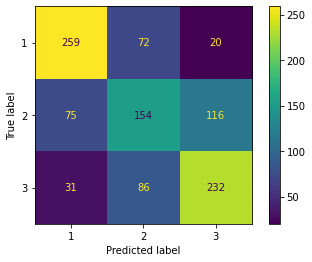

Classification report for Test data:
---------------------------------------------------------
              precision    recall  f1-score   support

           1       0.71      0.74      0.72       351
           2       0.49      0.45      0.47       345
           3       0.63      0.66      0.65       349

    accuracy                           0.62      1045
   macro avg       0.61      0.62      0.61      1045
weighted avg       0.61      0.62      0.61      1045



In [394]:
xgbc = XGBClassifier(random_state=45,eval_metric='logloss')
xgbc.fit(X_train, y_train.ravel())
y_pred = xgbc.predict(X_test)

# model fitness for both train and test dataset
print('Model fitness') 
print('-'*25)
xgbc_train = xgbc.score(X_train, y_train)
print('Train-set Score:', round(xgbc_train,4))
xgbc_test = xgbc.score(X_test, y_test)
print('Test-set Score:', round(xgbc_test,4))
print('Accuracy:', round(accuracy_score(y_test, y_pred)*100,3))
print('\n') 

#calculate Confusion Matrix
plot_confusion_matrix(xgbc, X_test, y_test)
plt.show()

print("Classification report for Test data:")
print('-'*57)
print(classification_report(y_test, y_pred))

### Performance evaluation of Model

In [396]:
Perf_eval = {
    'model': ['Logistic Regression','Decision Tree','Random Forest','Adaboost',
              'Gradient Boosting ', 'XGBoost'],
    'Accuracy' : [62.5837, 61.818, 63.7327,63.062, 63.8282, 61.722],
}

eval_df = pd.DataFrame(data=Perf_eval)
eval_df.sort_values(by=['Accuracy'], ascending=False)

,model,Accuracy
4,Gradient Boosting,63.8282
2,Random Forest,63.7327
3,Adaboost,63.0620
0,Logistic Regression,62.5837
1,Decision Tree,61.8180
5,XGBoost,61.7220


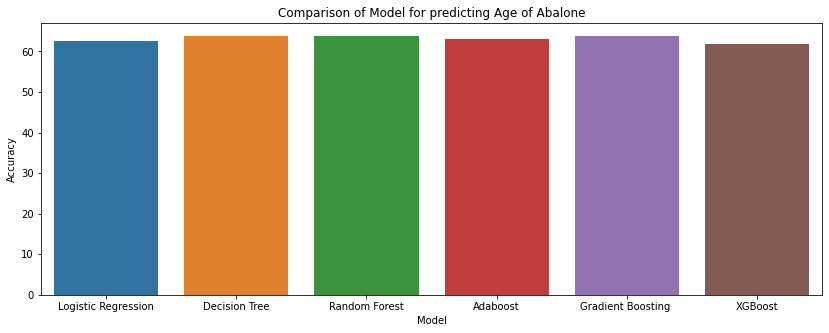

In [355]:
plt.figure(figsize=(14,5))
sns.barplot(x = eval_df['model'],
            y =eval_df['Accuracy'],
            data = eval_df
           )
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model for predicting Age of Abalone')
plt.show()